In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from pprint import pprint
from matplotlib.lines import Line2D
from glob import glob 
import sys

from scipy.special import comb

def plot_input_spikes(in_spikes, start_t, total_t, dt=1.0, img_shape=(28, 28), in_divs=(5, 3)):
    for lyr in sorted(in_spikes.keys()):
        s1 = in_spikes[lyr]
        w, h = img_shape if lyr < 2 else ((img_shape[0]//in_divs[0])+1, (img_shape[1]//in_divs[1])+1)
        num_images = int(np.ceil(total_t/float(dt)))
        imgs = [np.zeros((h, w)) for _ in range(num_images)]
        for idx, times in enumerate(s1):
            for t in sorted(times):
                r, c = int(idx//w), int(idx%w)
                if t < start_t or t>=start_t+total_t:
                    continue
                img_idx = int((t - start_t) // dt)
                if img_idx > num_images:
                    continue
                imgs[img_idx][r, c] += 1.0
        fw = 2
        plt.figure(figsize=(total_t*fw, fw))
        for idx, img in enumerate(imgs):
            ax = plt.subplot(1, total_t, idx+1)
            plt.imshow(img)
        plt.show()
        

In [2]:
base_dir = './L2L-OMNIGLOT/run_results/'
fname = os.path.join(base_dir, 'data_gen0_ind0.npz')
data = np.load(fname)

IOError: [Errno 2] No such file or directory: './L2L-OMNIGLOT/run_results/data_gen0_ind0.npz'

In [ ]:
2.0*np.pi

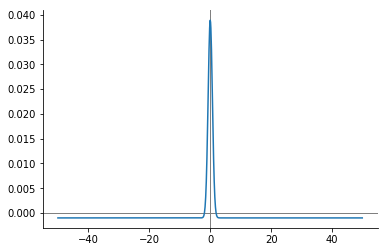

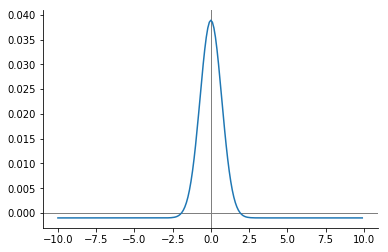

In [2]:
### variables
# learning rate, mean, deviation, LTD threshold
params = {
    "A_plus": 0.1,
    "A_minus": 0.001,
    "mean": 0.0,
    "std": 1.0,
    "displace": 0.01,
    "maxDt": 50.0,
}
rate = params['A_plus']
m = params['mean']
std = params['std']
var = (std)**2
neg_thr = params['displace']
x = np.arange(-params['maxDt'], params['maxDt'], 0.1)
y = rate * ((1./(np.sqrt(2.0 * np.pi) * std)) * np.exp((-(x - m)**2)/(var)) - neg_thr) #- params['A_minus']

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)

x = np.arange(-10.0, 10.0, 0.1)
y = rate * ((1./(np.sqrt(2.0 * np.pi) * std)) * np.exp((-(x - m)**2)/(var)) - neg_thr) #- params['A_minus']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("learning_rule_full.svg")

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("learning_rule_zoom.svg")

plt.show()

0.0


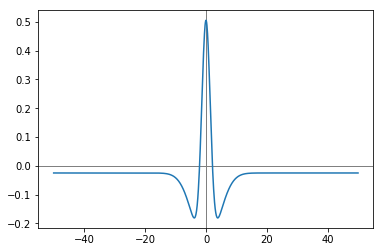

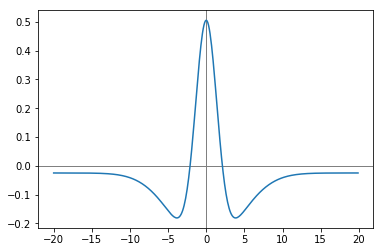

In [4]:
### variables
# learning rate, mean, deviation, LTD threshold
params = {
    "A_plus": 10.0,
    "A_minus": 0.001,
    "mean": 0.0,
    "std": 2.0,
    "displace": 0.0025,
    "maxDt": 50.0,
    "mult": 3.0,
}
rate = params['A_plus']
m = params['mean']
std = params['std']
var = (std)**2
varm = (params['mult']*std)**2
neg_thr = params['displace']
x = np.arange(-params['maxDt'], params['maxDt'], 0.1)
yp = (1./(2.0 * np.pi * std)) * np.exp((-(x - m)**2)/(var)) #- neg_thr #- params['A_minus']
ym = (1./(2.0 * np.pi * std * params['mult'])) * np.exp((-(x - m)**2)/(varm))# - neg_thr #- params['A_minus']
y = rate * (yp - ym - neg_thr)
print(np.sum(yp - ym))

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)

x = np.arange(-20.0, 20.0, 0.1)
yp = (1./(2.0 * np.pi * std)) * np.exp((-(x - m)**2)/(var)) #- neg_thr #- params['A_minus']
ym = (1./(2.0 * np.pi * std * params['mult'])) * np.exp((-(x - m)**2)/(varm))# - neg_thr #- params['A_minus']
y = rate * (yp - ym - neg_thr)

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)
plt.plot(x, y)


plt.show()

set([1264, 1986, 1603, 1989, 1770, 1871, 1936, 1202, 1477, 1205, 1434, 1311, 1701])
13


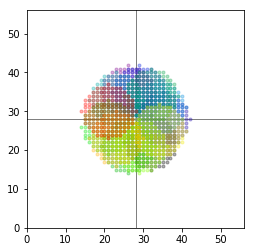

In [23]:
ndivs = 13
dang = (2.0 * np.pi) / ndivs
angles = np.arange(0.0, 2.0 * np.pi, dang)
radii = [7]#, 11, 17, 23, 31]
inw, inh = 56, 56
cr, cc = inh//2, inw//2
inf_r = 7


centers_i = set()
for r in radii:
    for a in angles:
        col = cc + int(np.round(r * np.cos(a))) 
        row = cr + int(np.round(r * np.sin(a))) 
        centers_i.add(row*inw + col)
print(centers_i)
centers_i_a = np.asarray(list(centers_i))
centers_r = centers_i_a // inw
centers_c = centers_i_a % inw


n_centers = len(centers_r)
print(n_centers)

gr = matplotlib.cm.rainbow
gr = matplotlib.cm.nipy_spectral
cmap_dc = gr.N//(n_centers + 1)
cmap = np.array([gr(i*cmap_dc) for i in range(n_centers+1)] )
cmap[:, 3] = 0.3


zones = {}
for zone_idx in range(n_centers):
    ir, ic = centers_r[zone_idx], centers_c[zone_idx]
    coords = zones.get(zone_idx, {'r': [], 'c': []})
    for dc in range(-inf_r, inf_r+1):
        for dr in range(-inf_r, inf_r+1):
            d = np.sqrt(dc**2 + dr**2)
            if d > inf_r:
                continue

            coords['r'].append(ir + dr)
            coords['c'].append(ic + dc)
                
    zones[zone_idx] = coords


fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_aspect('equal')
plt.axvline(cc, color='gray', linewidth=1.0)
plt.axhline(cr, color='gray', linewidth=1.0)
for idx in zones:
    plt.plot(zones[idx]['c'], zones[idx]['r'], '.', color=cmap[idx])

ax.set_xlim(0, inw)
ax.set_ylim(0, inh)
plt.show()

In [24]:
keys = data.keys()
print(keys)
# for k in keys:
#     print(k)
#     print(type(k))
#     print(data[k])

['recs', 'params', 'input', 'weights']


In [25]:
in_labels = data['input'].item()['labels']
print(in_labels)

BadZipfile: Truncated file header

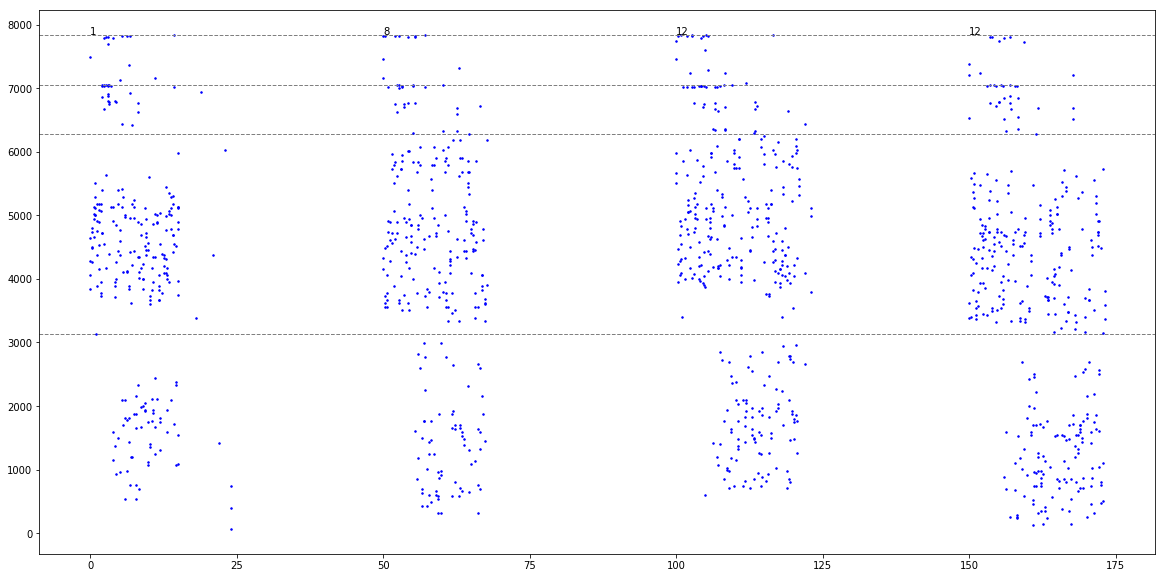

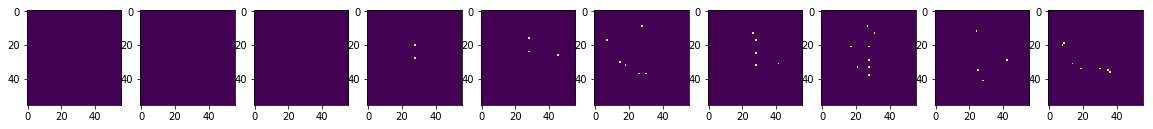

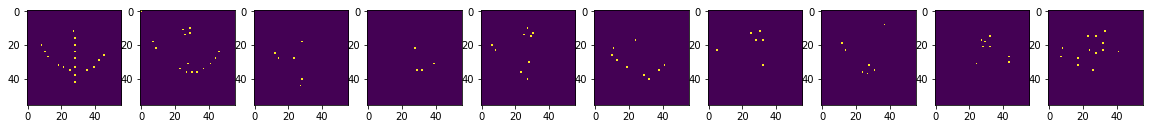

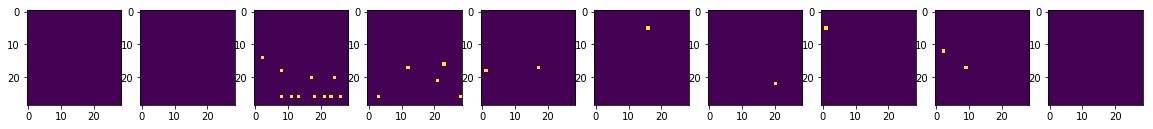

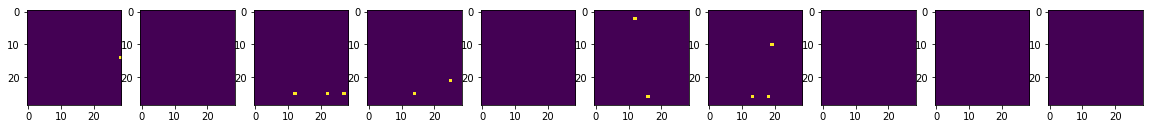

In [121]:
data = np.load('./L2L-OMNIGLOT/run_results/data_gen0_ind0.npz', allow_pickle=True)
in_shape = data['params'].item()['sim']['input_shape']
in_divs = data['params'].item()['sim']['input_divs']
in_spikes = data['input'].item()['spikes']
in_labels = data['input'].item()['labels']
dt = data['params'].item()['sim']['sample_dt']
count = 0
start_t = 1400
end_t = 1800
start_t = 0
end_t = 200
start_idx = start_t // dt
end_idx = end_t // dt
plt.figure(figsize=(20, 10))

for lyr in in_spikes:
    spk = in_spikes[lyr]
    for nid, times in enumerate(spk):
        if len(times):
            for t in times:
                if start_t <= t < end_t:
                    plt.plot(t, nid + count, '.b', markersize=3)
    count += len(spk)
    plt.axhline(count, color='gray', linestyle='--', linewidth=1.)

for t in np.arange(start_t, end_t, dt):
    try:
        plt.text(t, count, "%s"%in_labels[int(t//dt)])
    except:
        pass
    
plt.show()

plot_input_spikes(in_spikes, 0, 10, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1450, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1500, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1550, 5, img_shape=in_shape, in_divs=in_divs)
# plot_input_spikes(in_spikes, 1600, 5, img_shape=in_shape, in_divs=in_divs)

In [146]:
result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))
# result_files = sorted(glob('./L2L-OMNIGLOT/almost_working_run_results/*.npz'))
# result_files = sorted(glob('../juelich/run_results/*.npz'))
# result_files = sorted(glob('../titan/run_results/*.npz'))

total_different = 1 #comb(14, 2)
total_same = 4 * 14 * 0.1
total = 1.1 #total_different + total_same

tmp = np.load(result_files[0], allow_pickle=True)
data = {}
for k in tmp:
    try:
        data[k] = tmp[k].item()
    except:
        data[k] = tmp[k]
# print( list(all_individuals[0]['params']['ind'].keys()) )
all_params = {k: [] for k in data['params']['ind'].keys() \
                      if not (k == 'w_max_mult')}
print(all_params)
all_scores = []
fitnesses = {}
for rf in result_files[:]:
    sys.stdout.write("\r{}".format(rf))
    sys.stdout.flush()
    fn = os.path.basename(rf)
    fns = (fn.split('.')[0]).split('_')
    gen = int( fns[1].split('gen')[-1] )
    ind = int( fns[2].split('ind')[-1] )
    try:
        tmp = np.load(rf, allow_pickle=True)
        data = {}
        for k in tmp:
            try:
                data[k] = tmp[k].item()
            except:
                data[k] = tmp[k]
    except:
        continue

    try:
        for k in all_params:
            all_params[k].append( data['params']['ind'][k] )
    except:
        del all_params[k]
        continue
        
    ag = data['analysis']['aggregate_per_class']['fitness']
    ig = data['analysis']['individual_per_class']['fitness']
    _fit = ag + ig
    all_scores.append(_fit)
    
    

    
    l = fitnesses.get(gen, [])
    l.append(_fit)
    
    fitnesses[gen] = l


print()
n_bins = int( np.ceil(total  / 5.0) + 1)
minimum = []
maximum = []
average = []
for g in fitnesses:
    minimum.append(np.min(fitnesses[g]))
    maximum.append(np.max(fitnesses[g]))
    average.append(np.mean(fitnesses[g]))

    

{'out_prob': [], 'A_minus': [], 'mushroom_weight': [], 'w_min_mult': [], 'out_weight': [], 'expand': [], 'conn_dist': [], 'A_plus': [], 'exp_prob': []}
./L2L-OMNIGLOT/run_results/data_gen00000_ind00000.npz


./L2L-OMNIGLOT/run_results/data_gen00000_ind00023.npz

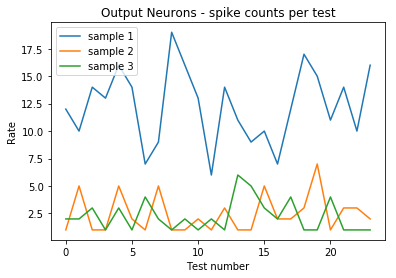

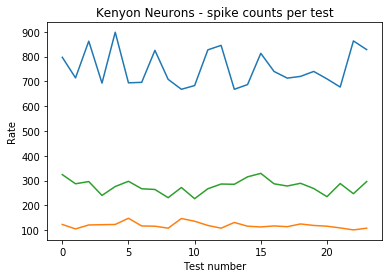

In [194]:
# def spiking_per_class(indices, spikes, start_t, end_t, dt):
#     uindices = np.unique(indices)
#     aggregate_per_class = {u: {} for u in uindices}
#     individual_per_class = {u: {} for u in uindices}
#     for st in np.arange(start_t, end_t, dt):
#         et = st + dt
#         class_idx = int(st // dt)
#         cls = int(indices[class_idx])
#         ind = {}
#         for nid, ts in enumerate(spikes):
#             times = np.array(ts)
#             whr = np.where(np.logical_and(st <= times, times < et))[0]
#             if len(whr):
#                 narray = aggregate_per_class[cls].get(nid, None)
#                 if narray is None:
#                     narray = times[whr]
#                 else:
#                     narray = np.append(narray, times[whr])

#                 ind[nid] = times[whr]

#                 aggregate_per_class[cls][nid] = narray

#         individual_per_class[cls][class_idx] = ind

#     return aggregate_per_class, individual_per_class


def split_per_dt(spikes, start_t, end_t, dt):
    spikes_dt = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        dt_act = []
        for nid, ts in enumerate(spikes):
            times = np.array(ts)
            whr = np.where(np.logical_and(st <= times, times < et))[0]
            new_ts = times[whr] if len(whr) else []
            dt_act.append(new_ts)

        spikes_dt.append(dt_act)
    return spikes_dt

def count_active_per_dt(split_spikes):
    count = []
    for spikes in split_spikes:
        count.append(np.sum([len(ts) for ts in spikes]))
    return count

result_files = sorted(glob('./L2L-OMNIGLOT/run_results/*.npz'))

mush_counts = []
out_counts = []
split_mush = []
count_mush = []
split_out = []
count_out = []
mush_spikes = []
out_spikes = []
for rf in result_files[:]:
    sys.stdout.write("\r{}".format(rf))
    sys.stdout.flush()

    tmp = np.load(rf, allow_pickle=True)
    data = {}
    for k in tmp:
        try:
            data[k] = tmp[k].item()
        except:
            data[k] = tmp[k]

    mush_spikes[:] = data['recs']['mushroom'][0]['spikes']
    out_spikes[:] = data['recs']['output'][0]['spikes']

    n_class = data['params']['sim']['num_classes']
    samp_dt = data['params']['sim']['sample_dt']
    end_t = data['params']['sim']['duration']
    start_t = 0

    split_mush = split_per_dt(mush_spikes, start_t, end_t, samp_dt)
    count_mush = count_active_per_dt(split_mush)
    mush_counts.append(count_mush)


    split_out = split_per_dt(out_spikes, start_t, end_t, samp_dt)
    count_out = count_active_per_dt(split_out)
    out_counts.append(count_out)

plt.figure()
ax = plt.subplot(1,1,1)
tmp = np.asarray(out_counts)
for i, c in enumerate(tmp.T):
    plt.plot(c, label="sample {}".format(i+1))
ax.set_title("Output Neurons - spike counts per test")
ax.set_xlabel("Test number")
ax.set_ylabel("Rate")
plt.legend()

plt.figure()
ax = plt.subplot(1,1,1)
tmp = np.asarray(mush_counts)
for i, c in enumerate(tmp.T):
    plt.plot(c, label="sample {}".format(i+1))
ax.set_title("Kenyon Neurons - spike counts per test")
ax.set_xlabel("Test number")
ax.set_ylabel("Rate")

plt.show()


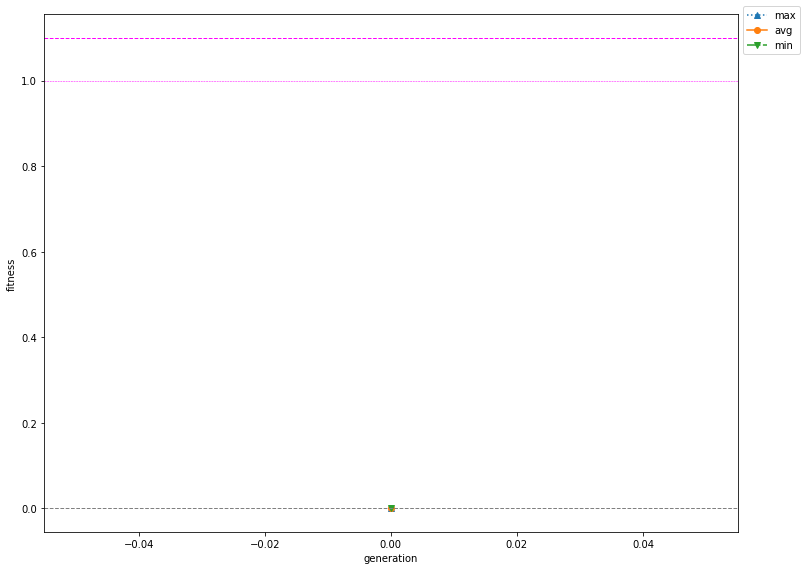

In [142]:
fw = 8
fig = plt.figure(figsize=(fw*np.sqrt(2), fw))
ax = plt.subplot(1, 1, 1)



for g in fitnesses:
    plt.plot(g * np.ones_like(fitnesses[g]), fitnesses[g], '.b', alpha=0.1)

plt.plot(np.asarray(maximum), '^', linestyle=':', label='max')
plt.plot(np.asarray(average), 'o', linestyle='-', label='avg')
plt.plot(np.asarray(minimum), 'v', linestyle='-.', label='min')

plt.axhline(total, linestyle='--', color='magenta', linewidth=1)
plt.axhline(total_different, linestyle='--', color='magenta', linewidth=0.5)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
ax.set_xlabel('generation')
ax.set_ylabel('fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
plt.tight_layout()
plt.savefig("fitness_per_generation.pdf")
plt.show()

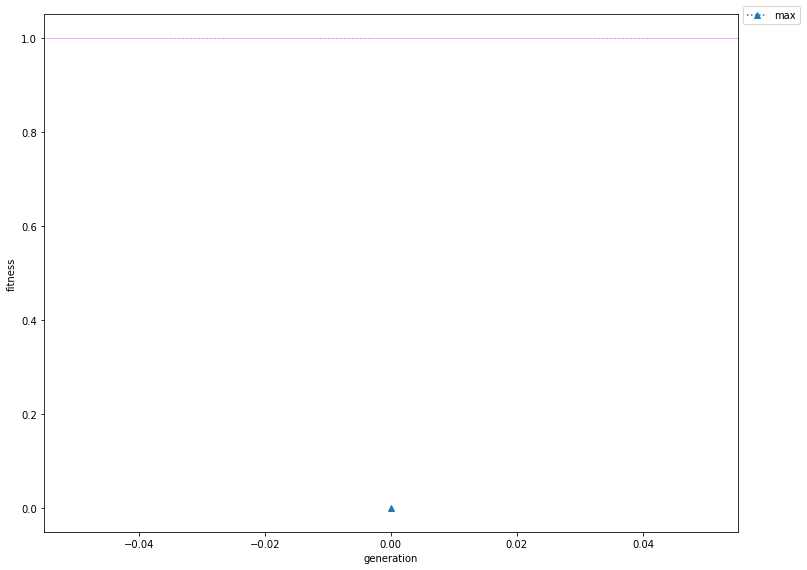

In [143]:
fw = 8
fig = plt.figure(figsize=(fw*np.sqrt(2), fw))
ax = plt.subplot(1, 1, 1)

plt.plot(np.asarray(maximum), '^', linestyle=':', label='max')

# plt.axhline(total, linestyle='--', color='magenta', linewidth=1)
plt.axhline(total_different, linestyle='--', color='magenta', linewidth=0.5)
ax.set_xlabel('generation')
ax.set_ylabel('fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
plt.tight_layout()
plt.savefig("max_fitness_per_generation.pdf")
plt.show()

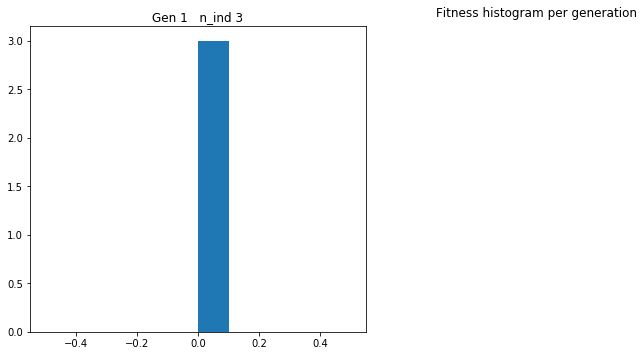

In [144]:
n_ind = len(fitnesses[0])
epochs = len(fitnesses)
ncols = 3
nrows =  epochs//ncols + int(epochs % ncols > 0)
fw = 5
fig = plt.figure(figsize=(fw*ncols, fw*nrows))
plt.suptitle("Fitness histogram per generation\n")
for g in fitnesses:
#     if len(fitnesses[g]) < n_ind:
#         continue
    ax = plt.subplot(nrows, ncols, g+1)
    ax.set_title("Gen %d   n_ind %d"%(g+1, len(fitnesses[g])))
    plt.hist(fitnesses[g])#, bins=n_bins)
#     ax.set_xticks(np.arange(0, total+11, 10))
    
plt.tight_layout()
plt.savefig("histogram_per_gen.pdf")
plt.show()

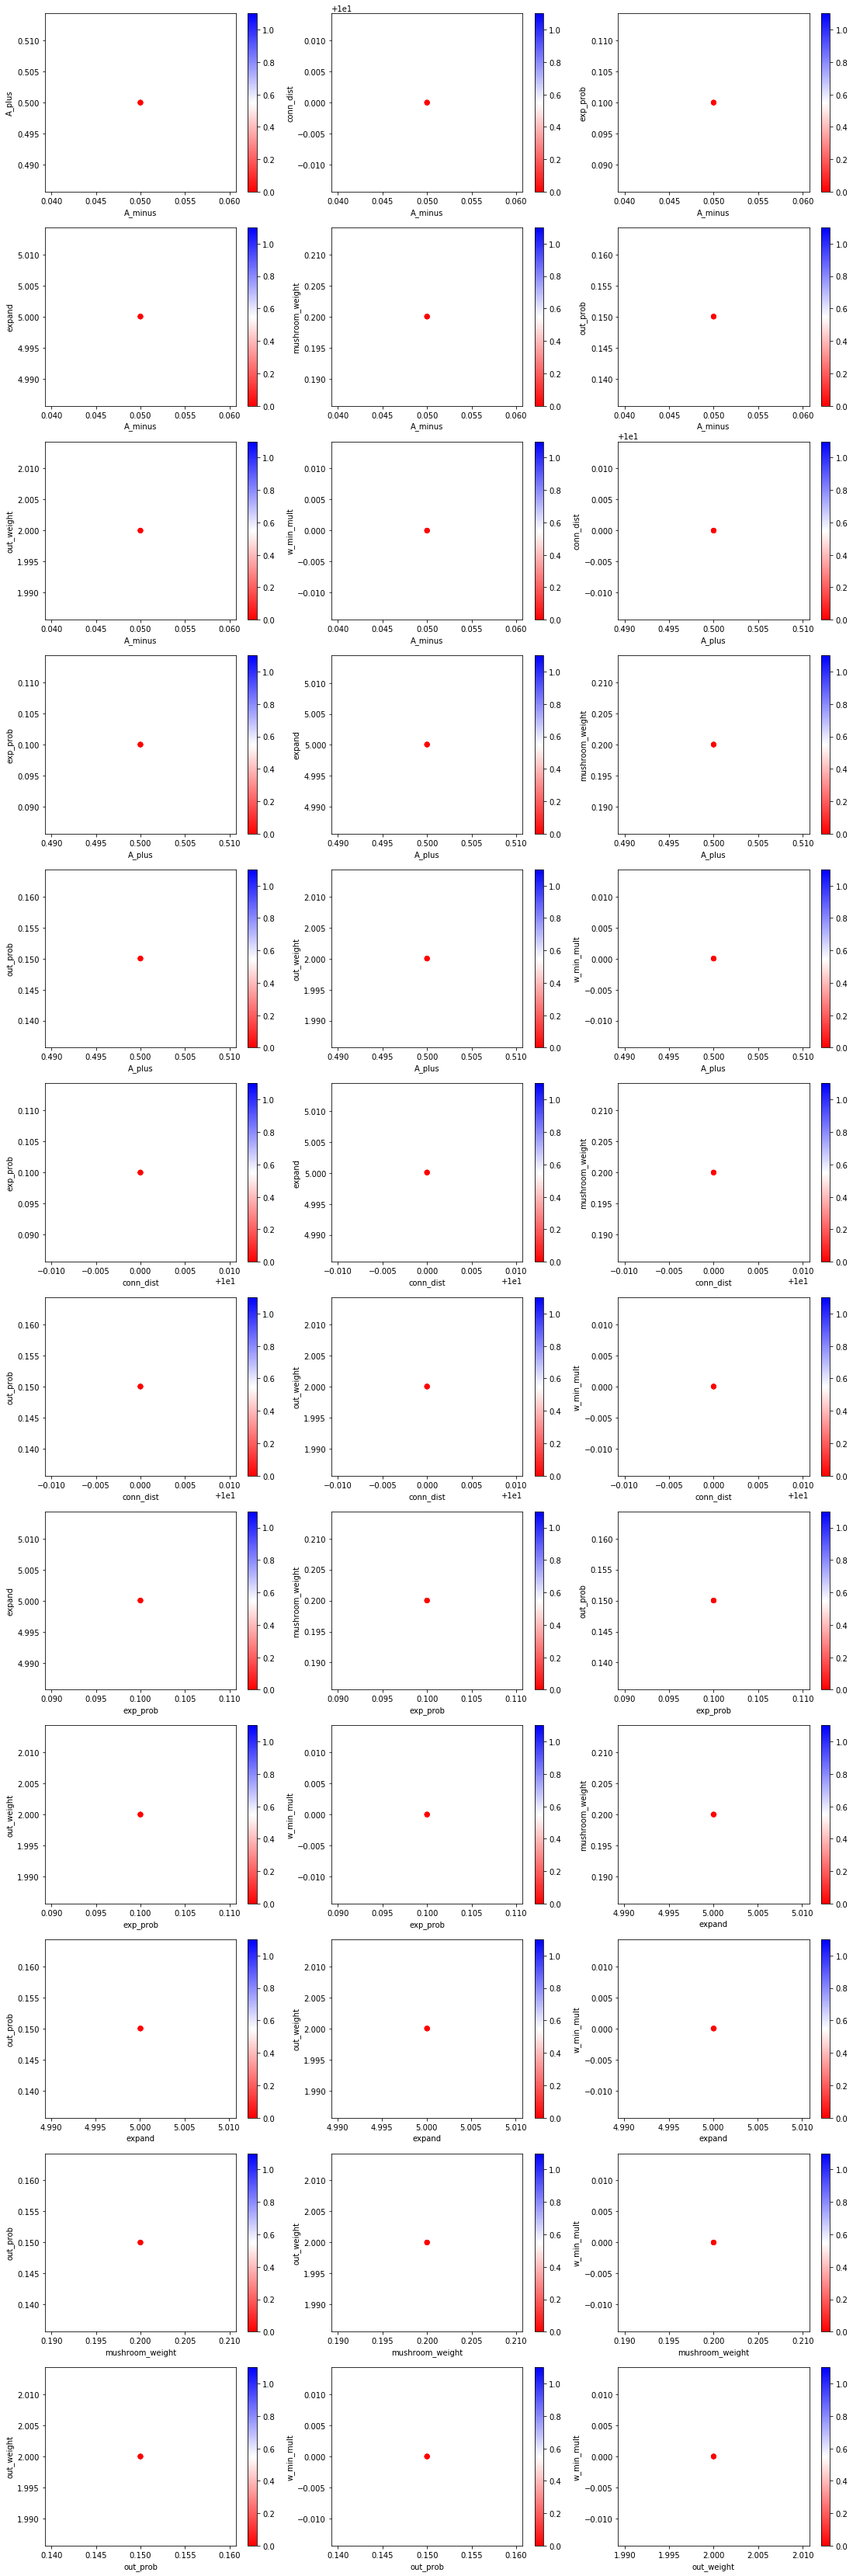

In [145]:
scores = np.asarray(all_scores) 
keys = sorted(list(all_params.keys()))
n_params = len(keys)
n_figs = comb(n_params, 2)
n_cols = 3
n_rows = n_figs // n_cols + int(n_figs % n_cols > 0)
fw = 5.0
fig = plt.figure(figsize=(fw*n_cols*1.25, fw*n_rows))
plt_idx = 1
for i in range(n_params):
    for j in range(i+1, n_params):
        ax = plt.subplot(n_rows, n_cols, plt_idx)
        im  = plt.scatter(all_params[keys[i]], all_params[keys[j]],
                          c=scores, 
#                           s=(100.0 - scores)+ 5.0, 
#                           s=scores + 5.0, 
                          vmin=0.0, vmax=total,
                          cmap='bwr_r',
#                           alpha=0.15
                         )
        plt.colorbar(im)
        
        ax.set_xlabel(keys[i])
        ax.set_ylabel(keys[j])
        
        plt_idx += 1
plt.show()
        

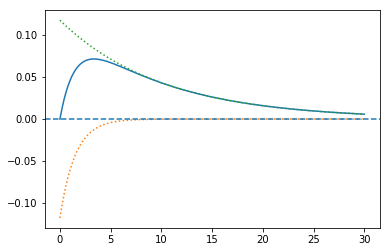

In [542]:
x = np.arange(0.0, 30.1, 0.1)
s = -(1.0/(10 - 1.5)) * np.exp(-x/1.5)
f = (1.0/(10 - 1.5)) * np.exp(-x/10.0)
v = f + s
plt.figure()
plt.plot(x, v)
plt.plot(x, s, linestyle=':')
plt.plot(x, f, linestyle=':')
plt.axhline(0, linestyle='--')
plt.show()

In [102]:
data = np.load('./run_results/data_gen0_ind0.npz')
data['params'].item()['ind']
data['params'].item()['sim']

FileNotFoundError: [Errno 2] No such file or directory: './run_results/data_gen0_ind0.npz'

In [5]:
data = np.load('./run_results/data_gen0_ind0.npz')
# data['params'].item()['ind']
# data['params'].item()['sim']
params = data['params'].item()
weights = data['weights'].item()
recordings = data['recs'].item()
    
print(weights.keys())
try:
    i2m = weights['input to mushroom']
    found = True
except:
    print("no weights in data")
    found = False

if found:
    for l in i2m:
        print(len(l))


    nz = data['input'].item()['n_zones']
    print(nz)
    total_mush = len(recordings['mushroom'][0]['spikes'])
    n_single = int(np.prod(nz[0]))
    n_per_zone = int(total_mush//nz['total'])
    width = params['sim']['input_shape'][1]

    img = np.zeros((width, width))
    lidx = 0
    for sp in range(0, total_mush, n_per_zone)[:n_single]:
        ep = sp + n_per_zone
        img[:] = 0

        for i in range(lidx, len(i2m[0])):
            pre, post, w, d = i2m[0][i]
            row, col = pre // width, pre % width
            img[row, col] += 1

            if post > ep:
                break
            lidx += 1


        print(w)
        fig = plt.figure()
        ax = plt.subplot(1, 1, 1)
        plt.imshow(img)
        plt.show()
        plt.close()


[u'mushroom to output']
no weights in data


In [6]:
x = [76,77,78,79,80,81,74,71,72,73,75,105,106,107,108,109,\
102,99,100,101,103,136,137,138,139,140,141,134,131,132,133,135,172,\
173,174,175,176,177,170,167,168,169,171,208,209,210,211,212,213,206,\
203,204,205,207,244,245,246,247,248,249,242,239,240,241,243,32,33,34,\
35,36,37,30,27,28,29,31,4,5,6,7,8,9,2,0,3,17,18,19,20,21,14,12,\
15,52,53,54,55,56,57,50,47,48,49,51]

pprint(np.array(sorted(x)))

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  17,
        18,  19,  20,  21,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  99, 100,
       101, 102, 103, 105, 106, 107, 108, 109, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249])


In [7]:
data = np.load('./run_results/data_gen0_ind0.npz')

use_gabor = data['params'].item()['sim']['use_gabor']
if use_gabor:
    recordings = data['recs'].item()
    gabor = recordings['gabor']

    n_layers = len(gabor.keys())
    fw = 2.0
    fig = plt.figure(figsize=(2*n_layers*fw, fw))
    for lyr in sorted(gabor.keys())[:]:
        ax = plt.subplot(1, n_layers, lyr+1)
        for r in sorted(gabor[lyr].keys())[:]:
            n_cols = len(gabor[lyr][r].keys())
            for c in gabor[lyr][r]:
                spikes = gabor[lyr][r][c]['spikes']
                n_neurons = len(spikes)
                for i, times in enumerate(spikes):
                    nid = r * n_cols * n_neurons + n_neurons * c + i
                    plt.plot(times, nid * np.ones_like(times), '.b', markersize=3)
    #         ax.set_ylim(-1, n_neurons * c + i + 1)
    plt.show()

(0.0, 50.0, 251.0)
(50.0, 100.0, 39.0)
(100.0, 150.0, 176.0)
(150.0, 200.0, 86.0)
(200.0, 250.0, 0.0)


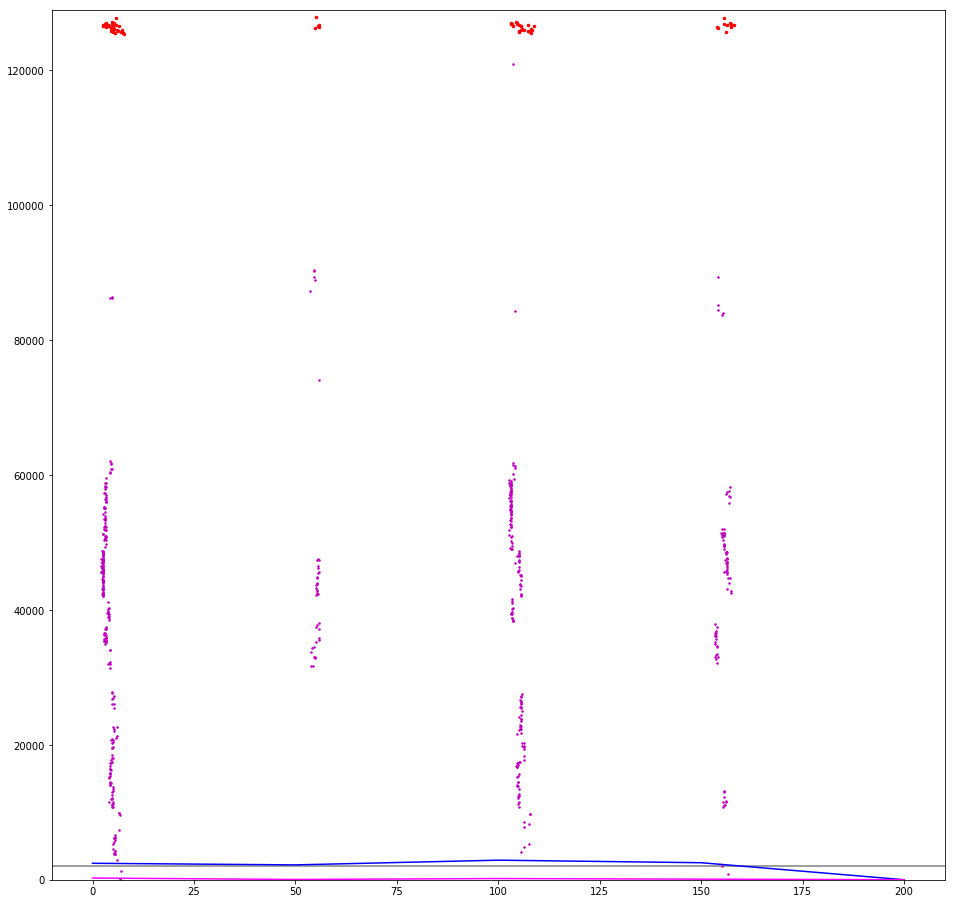

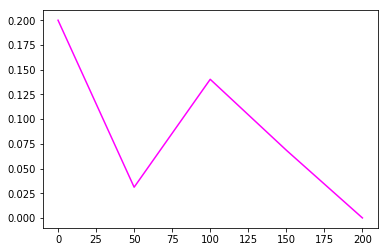

In [9]:
    data = np.load('./run_results/data_gen0_ind0.npz')
# try:



    n_out = data['params'].item()['sim']['output_size']
    n_test = data['params'].item()['sim']['test_per_class']
    n_classes = data['params'].item()['sim']['num_classes']
    n_out_per_class = n_out // n_classes
    dt = data['params'].item()['sim']['sample_dt']
    end_t = 210
    start_t = 0
    
    
    in_labels = data['input'].item()['labels']
    recordings = data['recs'].item()
    mush_spikes = recordings['mushroom'][0]['spikes']
    imush_spikes = recordings['inh_mushroom'][0]['spikes']
#     print(in_labels)
    n_mush = float(len(mush_spikes))

    in_spikes = data['input'].item()['spikes']
    in_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        n_inputs = 0.0
        for lyr in in_spikes:
            for i, times in enumerate(in_spikes[lyr]):
                for t in times:
                    if st <= t < et:
                        count += 1.0
            n_inputs += i
        in_rate.append(count/n_inputs)

    out_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        
        for i, times in enumerate(mush_spikes):
            for t in times:
                if st <= t < et:
                    count += 1.0
        print(st, et, count)
        out_rate.append(count)#/n_mush)

        
    plt.figure(figsize=(16, 16))
    ax = plt.subplot(1, 1, 1)
    plt.axhline(np.mean(in_rate)*len(mush_spikes), color='gray')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(in_rate) * n_mush, color='blue')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(out_rate), color='magenta')

    for i, times in enumerate(mush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.m', markersize=3)
    mj = 100
    for j, times in enumerate(imush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1+j*mj), '.r', markersize=5)
    
#     for t in np.arange(start_t, end_t, dt):
#         try:
#             plt.text(t, i*1.01, "%s"%in_labels[int(t//dt)])
#         except:
#             pass

#     plt.show()
    ax.set_ylim(-10, i+j*mj+10)
    plt.figure()
    plt.plot(np.arange(start_t, end_t, dt), (np.asarray(out_rate)/n_mush) *100, color='magenta')
    plt.show()
# except:
#     pass

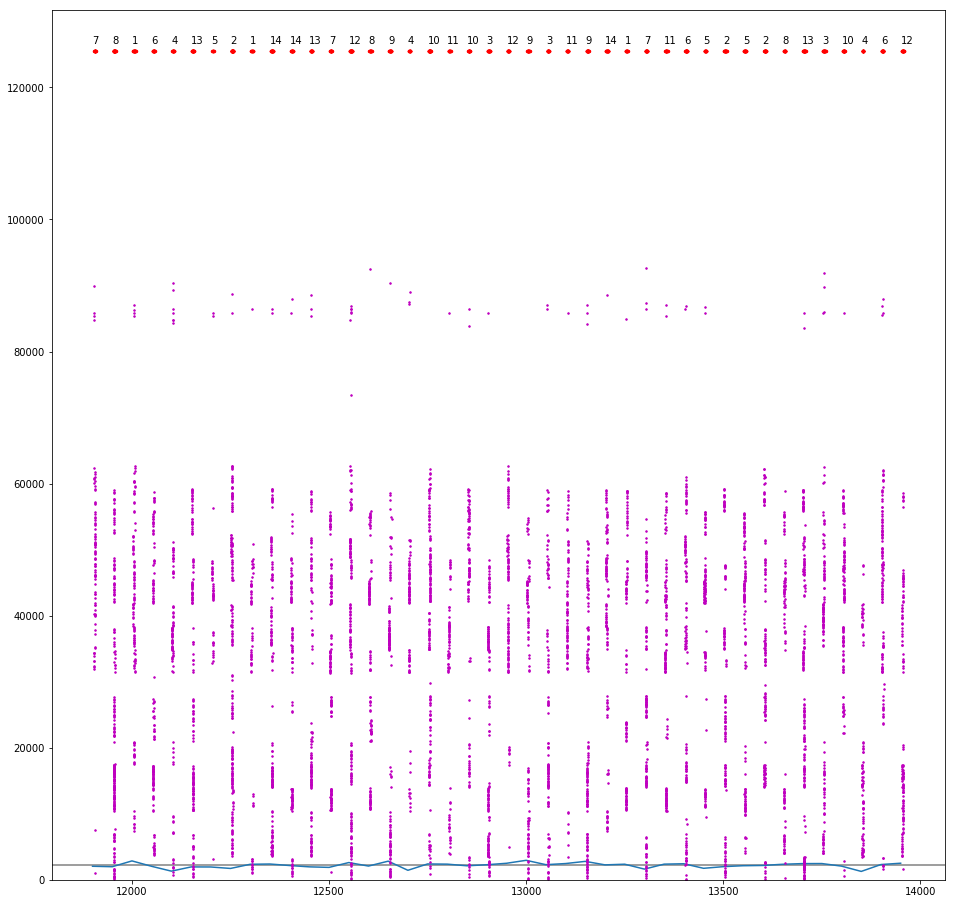

In [33]:
    data = np.load('./run_results/data_gen0_ind0.npz')
# try:
    n_out = data['params'].item()['sim']['output_size']
    n_test = data['params'].item()['sim']['test_per_class']
    n_classes = data['params'].item()['sim']['num_classes']
    n_out_per_class = n_out // n_classes
    dt = data['params'].item()['sim']['sample_dt']
    end_t = data['params'].item()['sim']['duration']
    start_t = end_t - n_classes * n_test * dt

    
    in_labels = data['input'].item()['labels']
    recordings = data['recs'].item()
    mush_spikes = recordings['mushroom'][0]['spikes']
    imush_spikes = recordings['inh_mushroom'][0]['spikes']
    
    

    in_spikes = data['input'].item()['spikes']
    in_rate = []
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        count = 0.0
        n_inputs = 0.0
        for lyr in in_spikes:
            for i, times in enumerate(in_spikes[lyr]):
                if times:
                    for t in times:
                        if st <= t < et:
                            count += 1.0
            n_inputs += i
        in_rate.append(count/n_inputs)
    
    
#     print(in_labels)
    plt.figure(figsize=(16, 16))
    

    ax = plt.subplot(1, 1, 1)
    
    plt.axhline(np.mean(in_rate)*len(mush_spikes), color='gray')
    plt.plot(np.arange(start_t, end_t, dt), np.asarray(in_rate) * len(mush_spikes))
    
    for i, times in enumerate(mush_spikes):
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.m', markersize=3)
    
    for times in imush_spikes:
        for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)
    ax.set_ylim(0, len(mush_spikes)*1.05)
    
    for t in np.arange(start_t, end_t, dt):
        plt.text(t, i*1.01, "%s"%in_labels[int(t//dt)])

    plt.show()
# except:
#     print("mushroom spikes not found")

['input', 'recs', 'params', 'weights']
125440
10


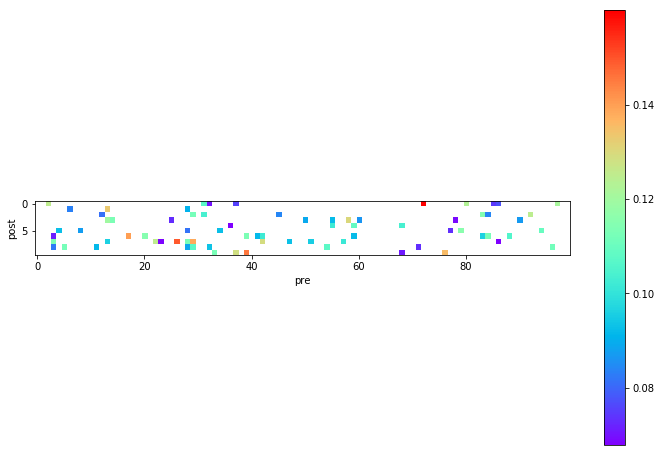

In [127]:
data = np.load('./run_results/data_gen0_ind0.npz')
print(data.keys())
ws = data['weights'].item()['mushroom to output']
print(len( ws ))
print(len( ws[0]))
npre = min(100, len(ws))
npost = len(ws[0])
img = np.ones((npre, npost)) * np.nan
for i, r in enumerate(ws[:npre]):
    img[i, :] = r

plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(img.T, cmap='rainbow')
ax.set_xlabel('pre')
ax.set_ylabel('post')
plt.colorbar(im)
plt.show()

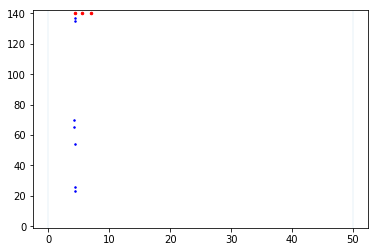

In [11]:
data = np.load('./run_results/data_gen0_ind0.npz')
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
iout_spikes = recordings['inh_output'][0]['spikes']
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
end_t = 100
start_t = 0

plt.figure()
ax = plt.subplot(1, 1, 1)
for t in range(start_t, end_t, int(dt)):
    plt.axvline(t, linewidth=0.1)
    
for i, times in enumerate(out_spikes):
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.b', markersize=3)

for times in iout_spikes:
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)

ax.set_ylim(-1, n_out+2)
plt.show()

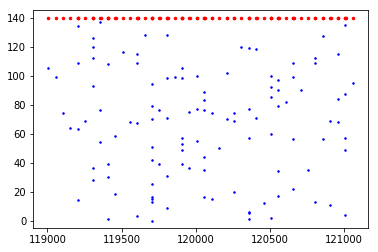

In [35]:
data = np.load('./run_results/data_gen0_ind0.npz')
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
iout_spikes = recordings['inh_output'][0]['spikes']
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
end_t = data['params'].item()['sim']['duration']
start_t = end_t - n_classes * n_test * dt

plt.figure()
ax = plt.subplot(1, 1, 1)

for i, times in enumerate(out_spikes):
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, i, '.b', markersize=3)

for times in iout_spikes:
    for t in times:
            if t >= start_t and t < end_t:
                plt.plot(t, (i+1), '.r', markersize=5)

ax.set_ylim(-5, n_out+5)


plt.show()

In [25]:
l = [1, 2, 3]
l *= 3
l + [5, 5]

[1, 2, 3, 1, 2, 3, 1, 2, 3, 5, 5]

In [26]:
from collections import OrderedDict
x = OrderedDict({1: 10, 2: 20, 3: 30, 9: 90})
for kx in x:
    print(kx)

1
2
3
9


In [27]:
np.repeat([1, 2, 3], 5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f7521267278>)
['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'd', 'D', 'P', 'X', '+']


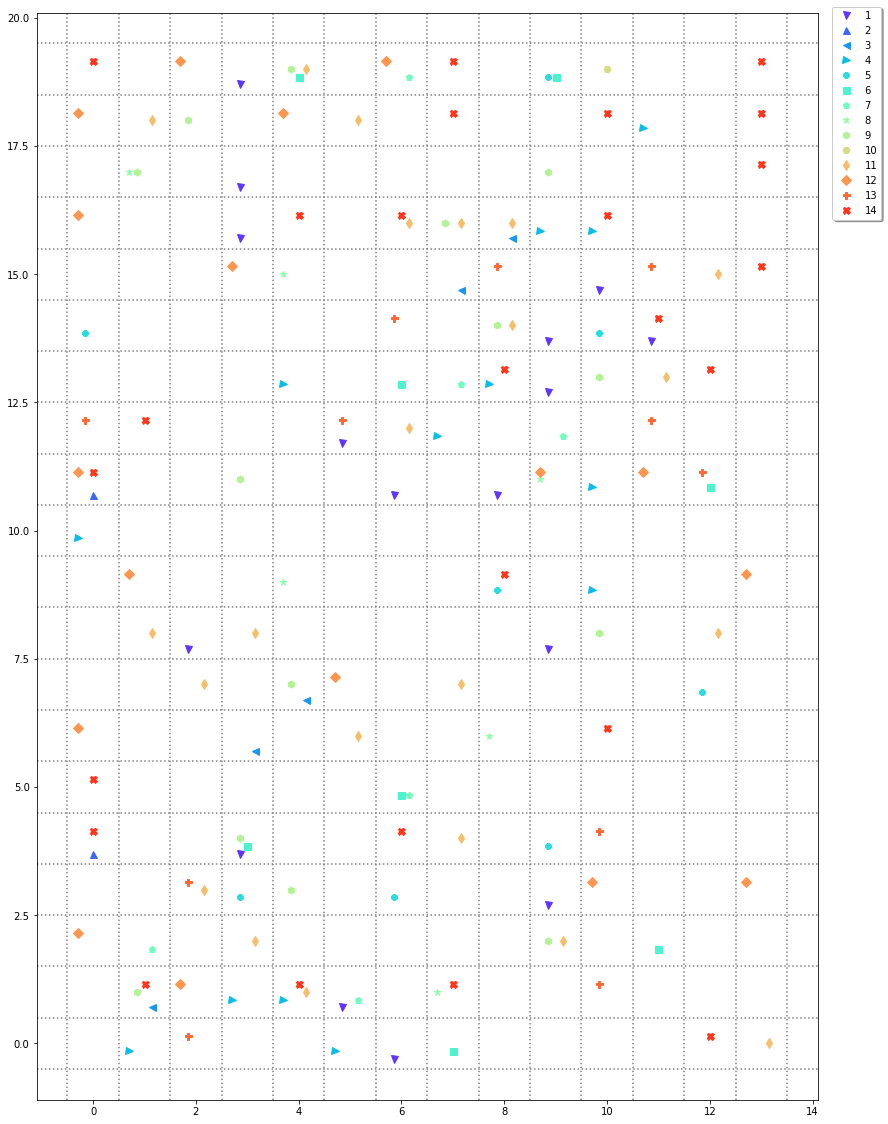

3.065600898415484


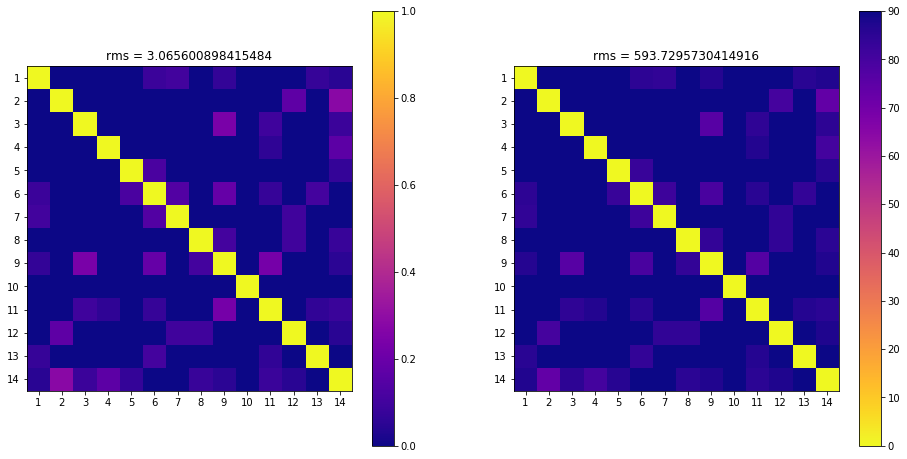

In [7]:
def spiking_per_class(indices, spikes, start_t, end_t, dt):
    neurons_per_class = {u: {} for u in np.unique(indices)}
    et = 0
    for st in np.arange(start_t, end_t, dt):
        et = st + dt
        class_idx = int((st-start_t)//dt)
        cls = int(indices[class_idx])
        for nid, ts in enumerate(spikes):
            times = np.array(ts)
            whr = np.where(np.logical_and(st <= times, times < et))[0]
            if len(whr):
                narray = neurons_per_class[cls].get(nid, None)
                if narray is None:
                    narray = times[whr]
                else:
                    narray = np.append(narray, times[whr])

                neurons_per_class[cls][nid] = narray

    return neurons_per_class

base_dir = './L2L-OMNIGLOT/run_results/'
fname = os.path.join(base_dir, 'data_gen0_ind0.npz')
data = np.load(fname, allow_pickle=True)
print(data.keys())
n_out = data['params'].item()['sim']['output_size']
n_test = data['params'].item()['sim']['test_per_class']
n_classes = data['params'].item()['sim']['num_classes']
n_out_per_class = n_out // n_classes
dt = data['params'].item()['sim']['sample_dt']
recordings = data['recs'].item()
out_spikes = recordings['output'][0]['spikes']
labels = data['input'].item()['labels']
end_t = data['params'].item()['sim']['duration']
start_t = end_t - n_classes * n_test * dt
npc = spiking_per_class(labels, out_spikes, start_t, end_t, dt)
# pprint(npc)



from matplotlib.lines import Line2D
# markers = [m for m in Line2D.filled_markers ]
markers = [
    u'o', u'v', u'^', u'<', u'>', u'8', u's', u'p', u'*', 
    u'h', u'H', u'd', u'D', u'P', u'X', u'+',
]
# markers = ['o', 'v', '<', 's', 'P', '*', 'X', 'D', 'H', '>'] * 2

# markers = ["$%s$"%s for s in "abcdefghijklmnopqrst"]

# gr = matplotlib.cm.nipy_spectral
gr = matplotlib.cm.rainbow
cmap_dc = gr.N//(n_classes+1)
cmap = np.array([gr(i*cmap_dc) for i in range(n_classes+1)] )
cmap[:, 3] = 1.0
sqr_nclass = np.ceil(np.sqrt(n_classes))
print(markers)
plt.figure(figsize=(n_classes, n_out_per_class))
ax = plt.subplot(1, 1, 1)

for x in range(n_classes + 1):
    plt.axvline(x-0.5, color='gray', linestyle=':')

for y in range(n_out_per_class + 1):
    plt.axhline(y-0.5, color='gray', linestyle=':')
    
for cls, spikes in npc.items():
    mrk = markers[cls % len(markers)]
    clr = cmap[cls]
    first_plot = True
    for nid in spikes:
        y = nid // n_classes
        x = nid % n_classes
        
        dx = 0.15*((cls % sqr_nclass) - (sqr_nclass/2.0)) #* (1.5/float(n_classes))
        dy = 0.15*((cls // sqr_nclass) - (sqr_nclass/2.0)) #* (1.5/float(n_classes))

        
        if first_plot:
            label = cls
            first_plot = False
        else:
            label = None
        plt.plot(x+dx, y+dy, marker=mrk, markerfacecolor=clr, markersize=7,
                 markeredgecolor=clr, markeredgewidth=1, label=label, linestyle='none')

ax.set_xlim(-1.1, n_classes + 0.1)
ax.set_ylim(-1.1, n_out_per_class + 0.1)
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.01), shadow=True, ncol=1)
plt.show()
# npc


cmap = 'plasma'
vectors = [np.zeros(n_classes*n_out_per_class) for _ in npc]
for c in npc:
    vectors[c-1][list(npc[c].keys())] = 1
    
dots = np.asarray([[np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y)) for x in vectors] for y in vectors])
angles = np.asarray([[np.degrees(np.arccos(d)) if d < 0.999 else 0.0 for d in dots_row  ] for dots_row in dots])

dtriu = [np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)) \
         for ix, x in enumerate(vectors) for iy, y in enumerate(vectors) if ix > iy]
print(np.sum(dtriu))
# for l in dtriu:
#     print(len(l), l)


fw = 8.0
plt.figure(figsize=(2*fw, fw))
ax = plt.subplot(1, 2, 1)
ax.set_title('sum of cos = {}'.format(np.sum(dtriu)))
im = plt.imshow(dots, cmap=cmap, vmin=0.0, vmax=1.0)
ax.set_xticks(np.arange(n_classes))
ax.set_xticklabels(np.arange(1, n_classes+1, dtype='int'))
ax.set_yticks(np.arange(n_classes))
ax.set_yticklabels(np.arange(1, n_classes+1, dtype='int'))
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title('rms = {}'.format( np.mean((90.0-angles)**2) ))
im = plt.imshow(angles, cmap=cmap+'_r', vmin=0.0, vmax=90.0)
ax.set_xticks(np.arange(n_classes))
ax.set_xticklabels(np.arange(1, n_classes+1, dtype='int'))
ax.set_yticks(np.arange(n_classes))
ax.set_yticklabels(np.arange(1, n_classes+1, dtype='int'))
plt.colorbar(im)

plt.show()


In [26]:
# npc
import scipy as sp
from scipy.special import comb

comb(np.arange(10)+1, 2)

array([  0.,   1.,   3.,   6.,  10.,  15.,  21.,  28.,  36.,  45.])

-c:6: RuntimeWarning: invalid value encountered in double_scalars


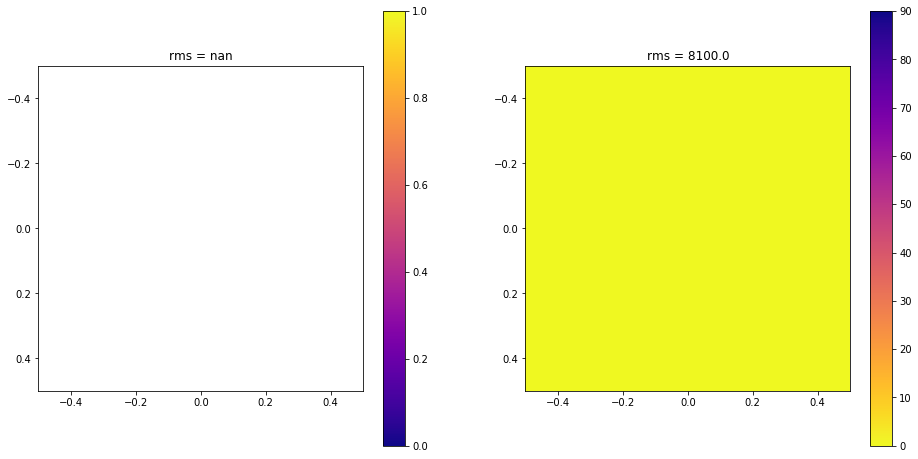

In [37]:
cmap = 'plasma'
vectors = [np.zeros(n_classes*n_out_per_class) for _ in npc]
for c in npc:
    vectors[c-1][npc[c].keys()] = 1
    
dots = np.asarray([[np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y)) for x in vectors] for y in vectors])
angles = np.asarray([[np.degrees(np.arccos(d)) if d < 0.999 else 0.0 for d in dots_row  ] for dots_row in dots])

fw = 8.0
plt.figure(figsize=(2*fw, fw))
ax = plt.subplot(1, 2, 1)
ax.set_title('rms = {}'.format( np.mean((1.0 - dots)**2) ))
im = plt.imshow(dots, cmap=cmap, vmin=0.0, vmax=1.0)
plt.colorbar(im)

ax = plt.subplot(1, 2, 2)
ax.set_title('rms = {}'.format( np.mean((90.0-angles)**2) ))
im = plt.imshow(angles, cmap=cmap+'_r', vmin=0.0, vmax=90.0)
plt.colorbar(im)

plt.show()

In [38]:
data = np.load('./run_results/data_gen0_ind0.npz')
n_post = int(data['params'].item()['ind']['n_pi_divs'])
weights = data['weights'].item()
print(weights.keys())
wgabor = weights['input to gabor']
# print(wgabor)
for lyr in wgabor.keys()[:1]:
    for r in wgabor[lyr].keys()[:1]:
        for c in wgabor[lyr][r].keys()[:1]:
            img = [np.zeros((28, 28, 3)) for _ in range(n_post)]

            for x in wgabor[lyr][r][c]:
                ch = 0 if x == u'inh' else 1
#                 if x == u'exc':
#                     continue
                print(lyr, r, c, x, ch, len(wgabor[lyr][r][c][x]))
#                 print(wgabor[lyr][r][c][x])
                for pre, ws in enumerate(wgabor[lyr][r][c][x]):
                    for post, w in enumerate(ws):
                        if not np.isnan(w):
                            img[post][pre//28, pre%28, ch] = np.abs(w)
            
            plt.figure(figsize=(n_post*2.5, 2))
            for post in range(n_post):
                ax = plt.subplot(1, n_post, post + 1)
                max_v = np.max(np.abs(img[post]))
                plt.imshow(img[post]/max_v)
            plt.show()

[u'mushroom to output']


KeyError: 'input to gabor'

In [158]:
np.arccos(0.0)

1.5707963267948966

In [112]:
_w = 3
_h = 2
_d = 2

cs = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [0, 2, 0],
    [0, 2, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
    [1, 2, 0],
    [1, 2, 1],
]

for row, col, dep in cs:
    wd = _w*_d
    print(row * wd + col*_d + dep)

for idx in range(12):
    wd = _w*_d
    row = idx//(wd)
    col = (idx%wd)/_d
    dep = idx - row*wd - col*_d
    print([row, col, dep])

0
1
2
3
4
5
6
7
8
9
10
11
[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[0, 2, 0]
[0, 2, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]
[1, 2, 0]
[1, 2, 1]
